In [17]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [31]:
train_df.head()

,Penumpang_id,Asal,Sleeper_Plus,Kabin,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Nama,Tiba_Ditujuan,grup_id,penumpang_id
0,0001_01,Jakarta,False,B/0/P,Bali,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1
1,0002_01,Lampung,False,F/0/S,Bali,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1
2,0003_01,Jakarta,False,A/0/S,Bali,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1
3,0003_02,Jakarta,False,A/0/S,Bali,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2
4,0004_01,Lampung,False,F/1/S,Bali,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1


In [72]:
# Memisahkan column penumpang_id
train_df[['grup_id', 'penumpang_id']] = train_df['Penumpang_id'].str.split('_', expand=True)
train_df['grup_id'] = train_df['grup_id'].astype(int)
train_df['penumpang_id'] = train_df['penumpang_id'].astype(int)

# keep null value
def convert_to_int(value):
    try:
        return int(value)
    except (ValueError, TypeError):
        return ''

train_df[['dek', 'nomer_duduk', 'sisi']] = train_df['Kabin'].str.split('/', expand=True)
train_df['nomer_duduk'] = train_df['nomer_duduk'].apply(convert_to_int)
train_df.head()

,Penumpang_id,Asal,Sleeper_Plus,Kabin,Tujuan,Umur,VIP,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,Nama,Tiba_Ditujuan,grup_id,penumpang_id,dek,nomer_duduk,sisi
0,0001_01,Jakarta,False,B/0/P,Bali,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,1,B,0,P
1,0002_01,Lampung,False,F/0/S,Bali,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,2,1,F,0,S
2,0003_01,Jakarta,False,A/0/S,Bali,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,3,1,A,0,S
3,0003_02,Jakarta,False,A/0/S,Bali,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,3,2,A,0,S
4,0004_01,Lampung,False,F/1/S,Bali,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,4,1,F,1,S


In [73]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6954 entries, 0 to 6953
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Penumpang_id           6954 non-null   object 
 1   Asal                   6793 non-null   object 
 2   Sleeper_Plus           6783 non-null   object 
 3   Kabin                  6792 non-null   object 
 4   Tujuan                 6804 non-null   object 
 5   Umur                   6800 non-null   float64
 6   VIP                    6796 non-null   object 
 7   Servis_Kamar_Tambahan  6804 non-null   float64
 8   Belanja_Makanan        6801 non-null   float64
 9   Belanja_Merchandise    6786 non-null   float64
 10  Spa                    6808 non-null   float64
 11  Bioskop                6792 non-null   float64
 12  Nama                   6789 non-null   object 
 13  Tiba_Ditujuan          6954 non-null   bool   
 14  grup_id                6954 non-null   int64  
 15  penu

In [74]:
train_df.describe()

,Umur,Servis_Kamar_Tambahan,Belanja_Makanan,Belanja_Merchandise,Spa,Bioskop,grup_id,penumpang_id
count,6800.000000,6804.000000,6801.000000,6786.000000,6808.000000,6792.000000,6954.000000,6954.000000
mean,28.883676,225.257055,458.740038,174.220749,312.969741,302.348793,3702.777538,1.517400
std,14.570737,662.105367,1634.970406,550.497694,1152.953321,1139.927062,2125.139270,1.048129
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1850.750000,1.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3741.500000,1.000000
75%,38.000000,48.000000,76.000000,27.000000,58.000000,44.000000,5561.000000,2.000000
max,79.000000,14327.000000,29813.000000,12253.000000,22408.000000,24133.000000,7387.000000,8.000000


In [76]:
train_df.isnull().sum()

Penumpang_id               0
Asal                     161
Sleeper_Plus             171
Kabin                    162
Tujuan                   150
Umur                     154
VIP                      158
Servis_Kamar_Tambahan    150
Belanja_Makanan          153
Belanja_Merchandise      168
Spa                      146
Bioskop                  162
Nama                     165
Tiba_Ditujuan              0
grup_id                    0
penumpang_id               0
dek                      162
nomer_duduk                0
sisi                     162
dtype: int64

In [79]:
train_df.describe(include=['O'])

,Penumpang_id,Asal,Sleeper_Plus,Kabin,Tujuan,VIP,Nama,dek,nomer_duduk,sisi
count,6954,6793,6783,6792,6804,6796,6789,6792,6954,6792
unique,6954,3,2,5244,3,2,6777,8,1449,2
top,7387_01,Lampung,False,G/734/S,Bali,False,Gollux Reedall,F,,S
freq,1,3668,4365,8,4747,6650,2,2229,162,3417


/tmp/ipykernel_42221/1667580060.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True)


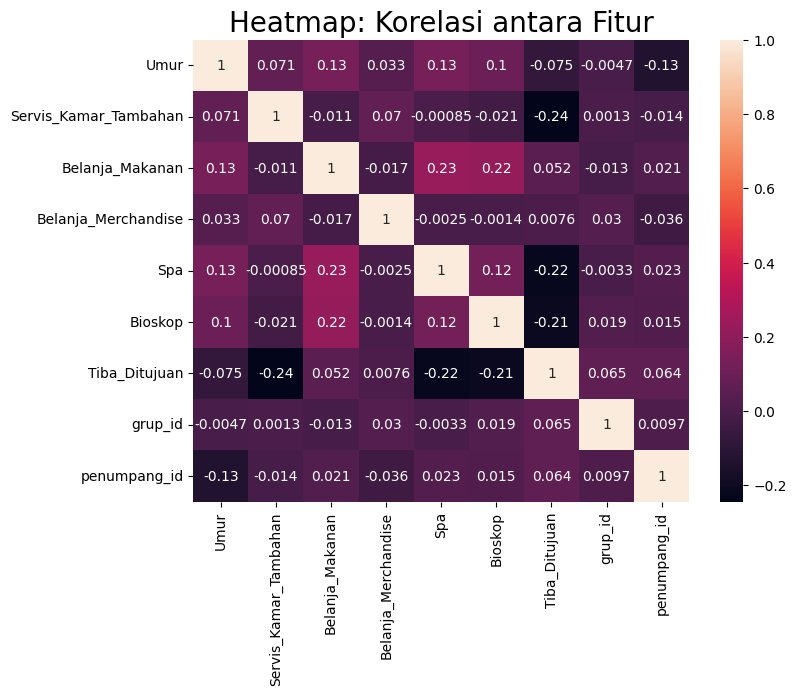

In [80]:
plt.figure(figsize=(8,6))
sns.heatmap(train_df.corr(), annot=True)
plt.title('Heatmap: Korelasi antara Fitur', fontsize=20)
plt.show()

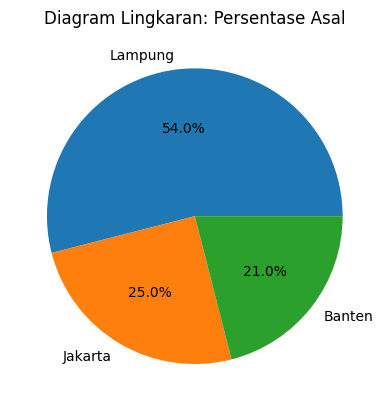

In [52]:
counts_asal = train_df['Asal'].value_counts()
plt.pie(counts_asal.values, labels=counts_asal.index, autopct='%1.1f%%')
plt.title('Diagram Lingkaran: Persentase Asal')
jjplt.show()

In [36]:
train_df[['Asal', 'Tiba_Ditujuan']].groupby(['Asal'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,Asal,Tiba_Ditujuan
1,Jakarta,0.658422
0,Banten,0.519972
2,Lampung,0.436750


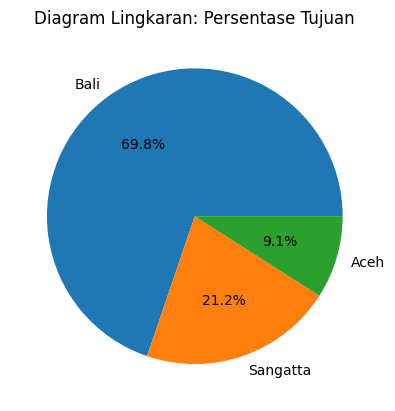

In [53]:
counts_tujuan = train_df['Tujuan'].value_counts()
plt.pie(counts_tujuan.values, labels=counts_tujuan.index, autopct='%1.1f%%')
plt.title('Diagram Lingkaran: Persentase Tujuan')
plt.show()

In [37]:
train_df[['Tujuan', 'Tiba_Ditujuan']].groupby(['Tujuan'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,Tujuan,Tiba_Ditujuan
2,Sangatta,0.612075
0,Aceh,0.514610
1,Bali,0.478618


In [38]:
train_df[['VIP', 'Tiba_Ditujuan']].groupby(['VIP'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,VIP,Tiba_Ditujuan
0,False,0.512782
1,True,0.397260


In [39]:
train_df[['Sleeper_Plus', 'Tiba_Ditujuan']].groupby(['Sleeper_Plus'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,Sleeper_Plus,Tiba_Ditujuan
1,True,0.820513
0,False,0.338373


In [40]:
train_df[['penumpang_id', 'Tiba_Ditujuan']].groupby(['penumpang_id'], as_index=False).mean().sort_values(by='Tiba_Ditujuan', ascending=False)

,penumpang_id,Tiba_Ditujuan
2,3,0.630435
3,4,0.604278
4,5,0.592233
1,2,0.558016
5,6,0.508197
6,7,0.486486
0,1,0.483903
7,8,0.285714


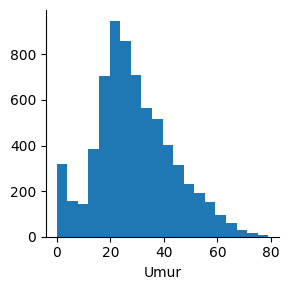

In [60]:
g = sns.FacetGrid(train_df)
g.map(plt.hist, 'Umur', bins=20)

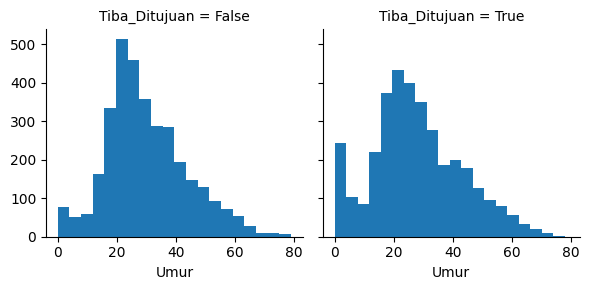

In [54]:
g = sns.FacetGrid(train_df, col='Tiba_Ditujuan')
g.map(plt.hist, 'Umur', bins=20)

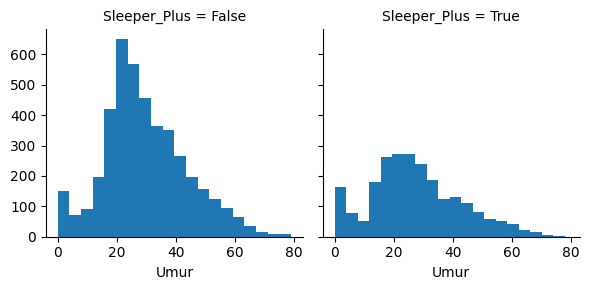

In [58]:
g = sns.FacetGrid(train_df, col='Sleeper_Plus')
g.map(plt.hist, 'Umur', bins=20)

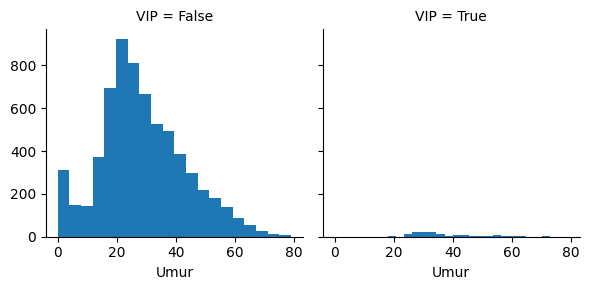

In [59]:
g = sns.FacetGrid(train_df, col='VIP')
g.map(plt.hist, 'Umur', bins=20)

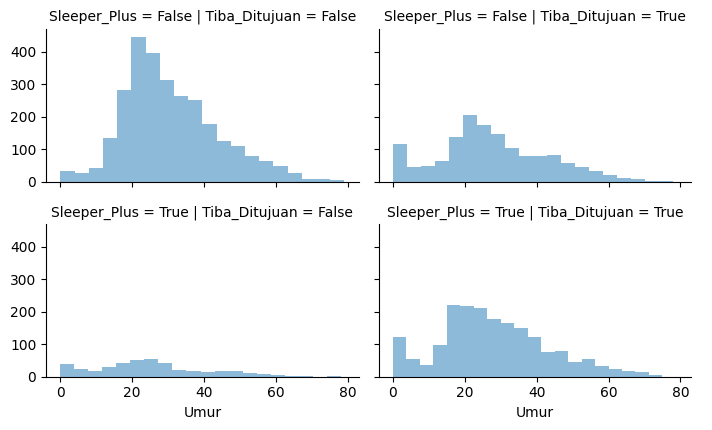

In [57]:
grid = sns.FacetGrid(train_df, col='Tiba_Ditujuan', row='Sleeper_Plus', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Umur', alpha=.5, bins=20)
grid.add_legend();

In [29]:
# Masukan train data yang sudah di-preprocessing di variable df_train
df_train = ...

# Masukan test data yang sudah di-preprocessing di variable df_test
df_test = ...

In [30]:
X = df_train.drop(columns=['Tiba_Ditujuan'])
y = df_train['Tiba_Ditujuan']

AttributeError: 'ellipsis' object has no attribute 'drop'

In [ ]:
# Mengimpor library yang diperlukan
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import pandas as pd


# Memisahkan data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model RandomForestClassifier
rf = RandomForestClassifier()

# Menentukan hyperparameters yang ingin diuji
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Membuat objek GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

# Melatih model dengan data latih
grid_search.fit(X_train, y_train)

In [ ]:
y_result = grid_search.predict(df_test)

In [ ]:
df_submission = pd.DataFrame({'Penumpang_id': df_test['Penumpang_id']})
df_submission['Tiba_Ditujuan'] = y_result

In [ ]:
df_submission.to_csv('submission.csv', index=False)